# Raaaaaats

In [1]:
# data analysis and wrangling
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import random as rnd
from decimal import *
%matplotlib notebook

# visualization
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from mpl_toolkits.basemap import Basemap



In [2]:
# Load dataset rat sightings from 09/04/2015 to 02/15/2017
dataset_sightings = pd.read_csv("Rat_Sightings.csv",low_memory=False)
# Load dataset rat interventions from 10/14/2019 to 01/26/2018
dataset_intervention = pd.read_csv("Rodent_Inspection.csv",low_memory=False)


In [3]:
dataset_sightings.head()
# dataset_intervention.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [4]:
dataset_sightings.groupby('Descriptor').size()  #check that all sightings are indeed Rat Sighting

Descriptor
Rat Sighting    107607
dtype: int64

In [5]:
dataset_sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107607 entries, 0 to 107606
Data columns (total 52 columns):
Unique Key                        107607 non-null int64
Created Date                      107607 non-null object
Closed Date                       96681 non-null object
Agency                            107607 non-null object
Agency Name                       107607 non-null object
Complaint Type                    107607 non-null object
Descriptor                        107607 non-null object
Location Type                     107601 non-null object
Incident Zip                      107247 non-null float64
Incident Address                  98120 non-null object
Street Name                       98119 non-null object
Cross Street 1                    89119 non-null object
Cross Street 2                    89084 non-null object
Intersection Street 1             9317 non-null object
Intersection Street 2             9317 non-null object
Address Type                      107236 no

In [84]:
### Data cleansing
dataset_sightings['Created Date'] = pd.to_datetime(dataset_sightings['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
dataset_sightings['YearMonth'] = dataset_sightings_locations['Created Date'].map(lambda x: x.strftime('%Y-%m'))
dataset_sightings_locations = dataset_sightings.iloc[:,[1,49,50,52]]

# dataset_sightings_locations = dataset_sightings_locations.assign(year=dataset_sightings_locations['Created Date'].dt.year)
# dataset_sightings_locations = dataset_sightings_locations.assign(month=dataset_sightings_locations['Created Date'].dt.month)

# dataset_sightings_locations_2016 = dataset_sightings_locations[dataset_sightings_locations['year']==2016]
# dataset_sightings_locations_2016 = dataset_sightings_locations_2016.dropna()
dataset_sightings_locations = dataset_sightings_locations.dropna()
dataset_sightings_locations

,Created Date,Latitude,Longitude,YearMonth
0,2015-09-04 00:00:00,40.707772,-74.012963,2015-09
1,2015-09-04 00:00:00,40.575209,-74.104547,2015-09
2,2015-09-04 00:00:00,40.631236,-74.126878,2015-09
3,2015-09-04 00:00:00,40.708987,-73.941207,2015-09
4,2015-09-04 00:00:00,40.854130,-73.864813,2015-09
5,2015-09-04 00:00:00,40.677223,-73.998713,2015-09
6,2015-09-04 00:00:00,40.767627,-73.824112,2015-09
7,2015-09-04 00:00:00,40.695878,-73.961500,2015-09
8,2015-09-04 00:00:00,40.740184,-73.986363,2015-09
9,2015-09-04 00:00:00,40.637298,-74.162365,2015-09


<IPython.core.display.Javascript object>


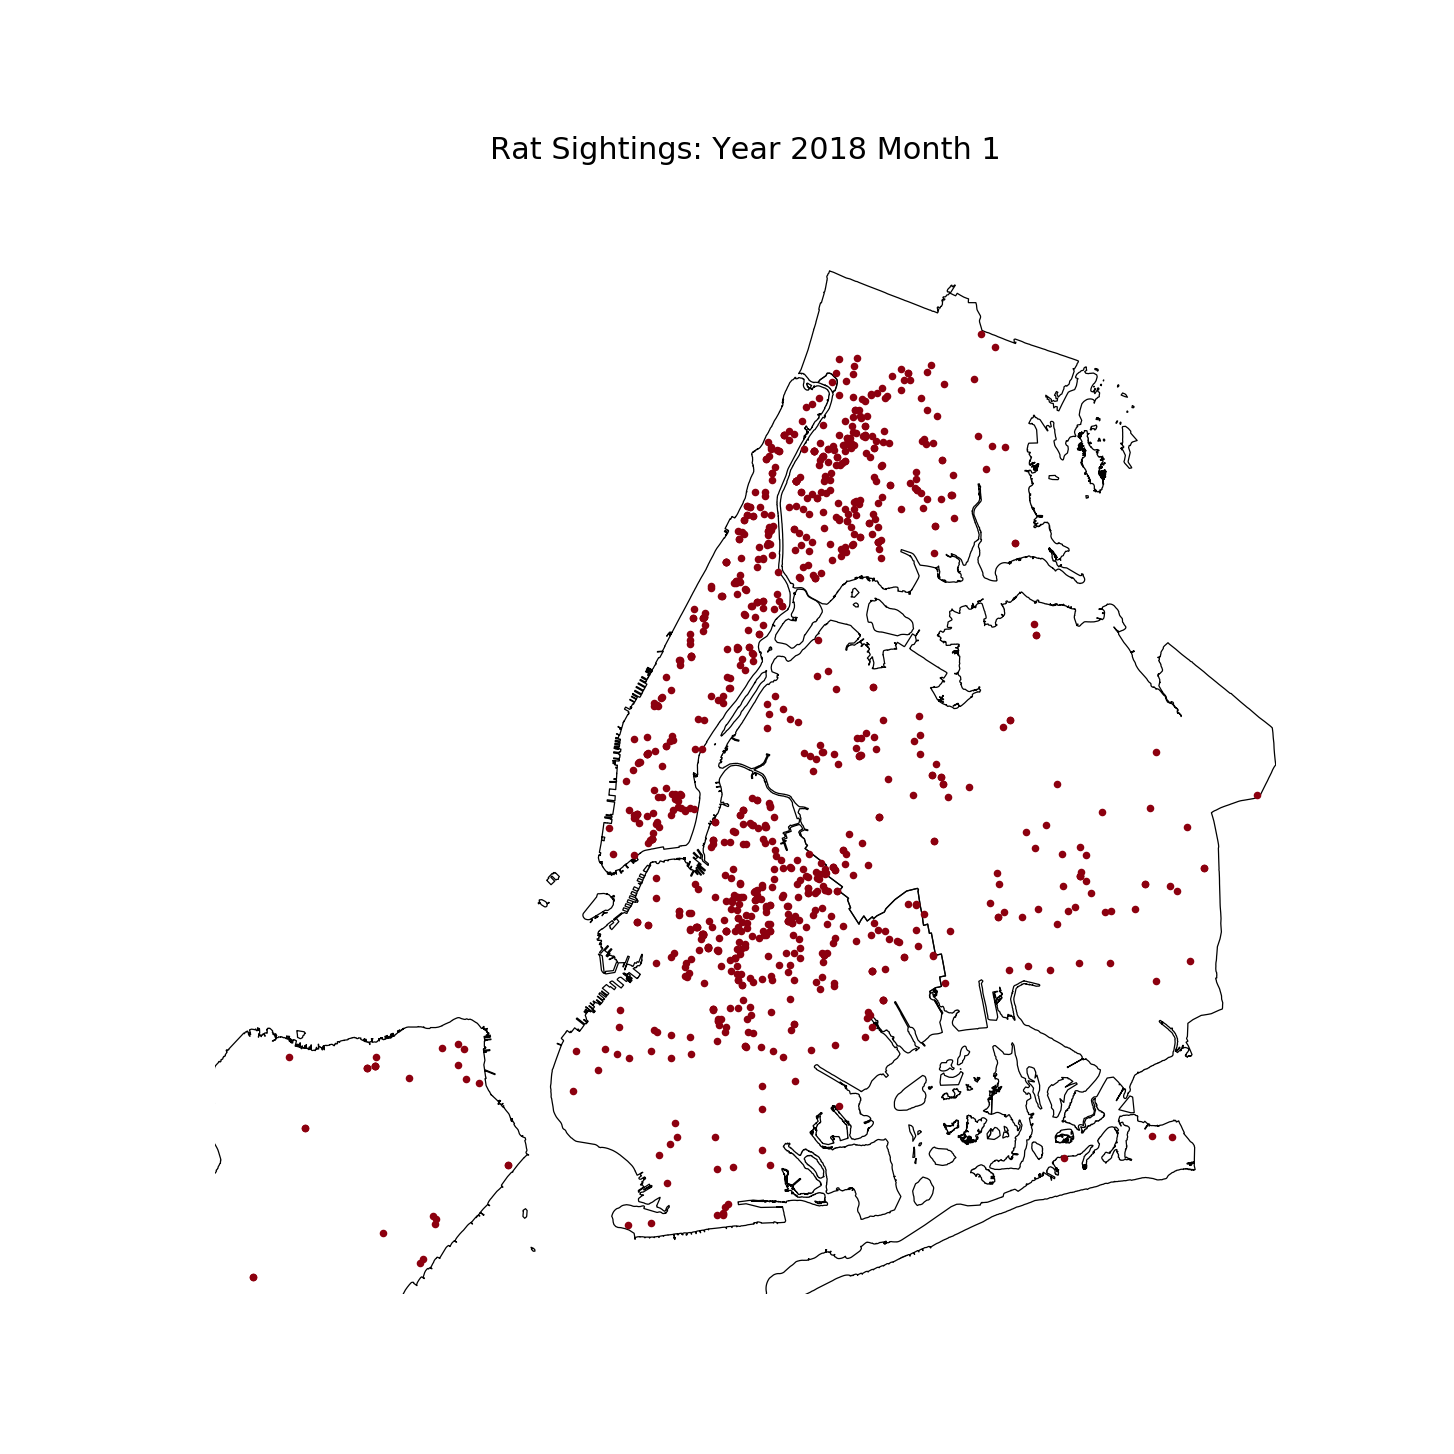

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [123]:
anim_data_new = dataset_sightings_locations.groupby('YearMonth') 
timepoints = dataset_sightings_locations['YearMonth'].unique()
timepoints.sort()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

m = Basemap(llcrnrlat=40.55,urcrnrlat=40.95,llcrnrlon=-74.2, urcrnrlon=-73.7, lat_ts=40.5, resolution='c', projection='merc')
m.readshapefile('geo_export_466a4803-d862-4a61-914b-7783568f80f5', 'comarques')
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

x,y = m(0, 0)
point = m.plot(x, y, 'ro', markersize=2, color = 'xkcd:crimson')[0]


def init():
    point.set_data([], [])
    return point,

def animate(i):
    x, y = m(anim_data_new.get_group(timepoints[i]).Longitude.tolist(), anim_data_new.get_group(timepoints[i]).Latitude.tolist())
    point.set_data(x, y)
    plt.title('Rat Sightings: Year ' + str(anim_data_new.get_group(timepoints[i]).iloc[0,0].year) + ' Month '+ str(anim_data_new.get_group(timepoints[i]).iloc[0,0].month))
    return point,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(timepoints)-2, interval=100, blit=True,repeat = False, save_count=len(timepoints))

plt.show()


<IPython.core.display.Javascript object>


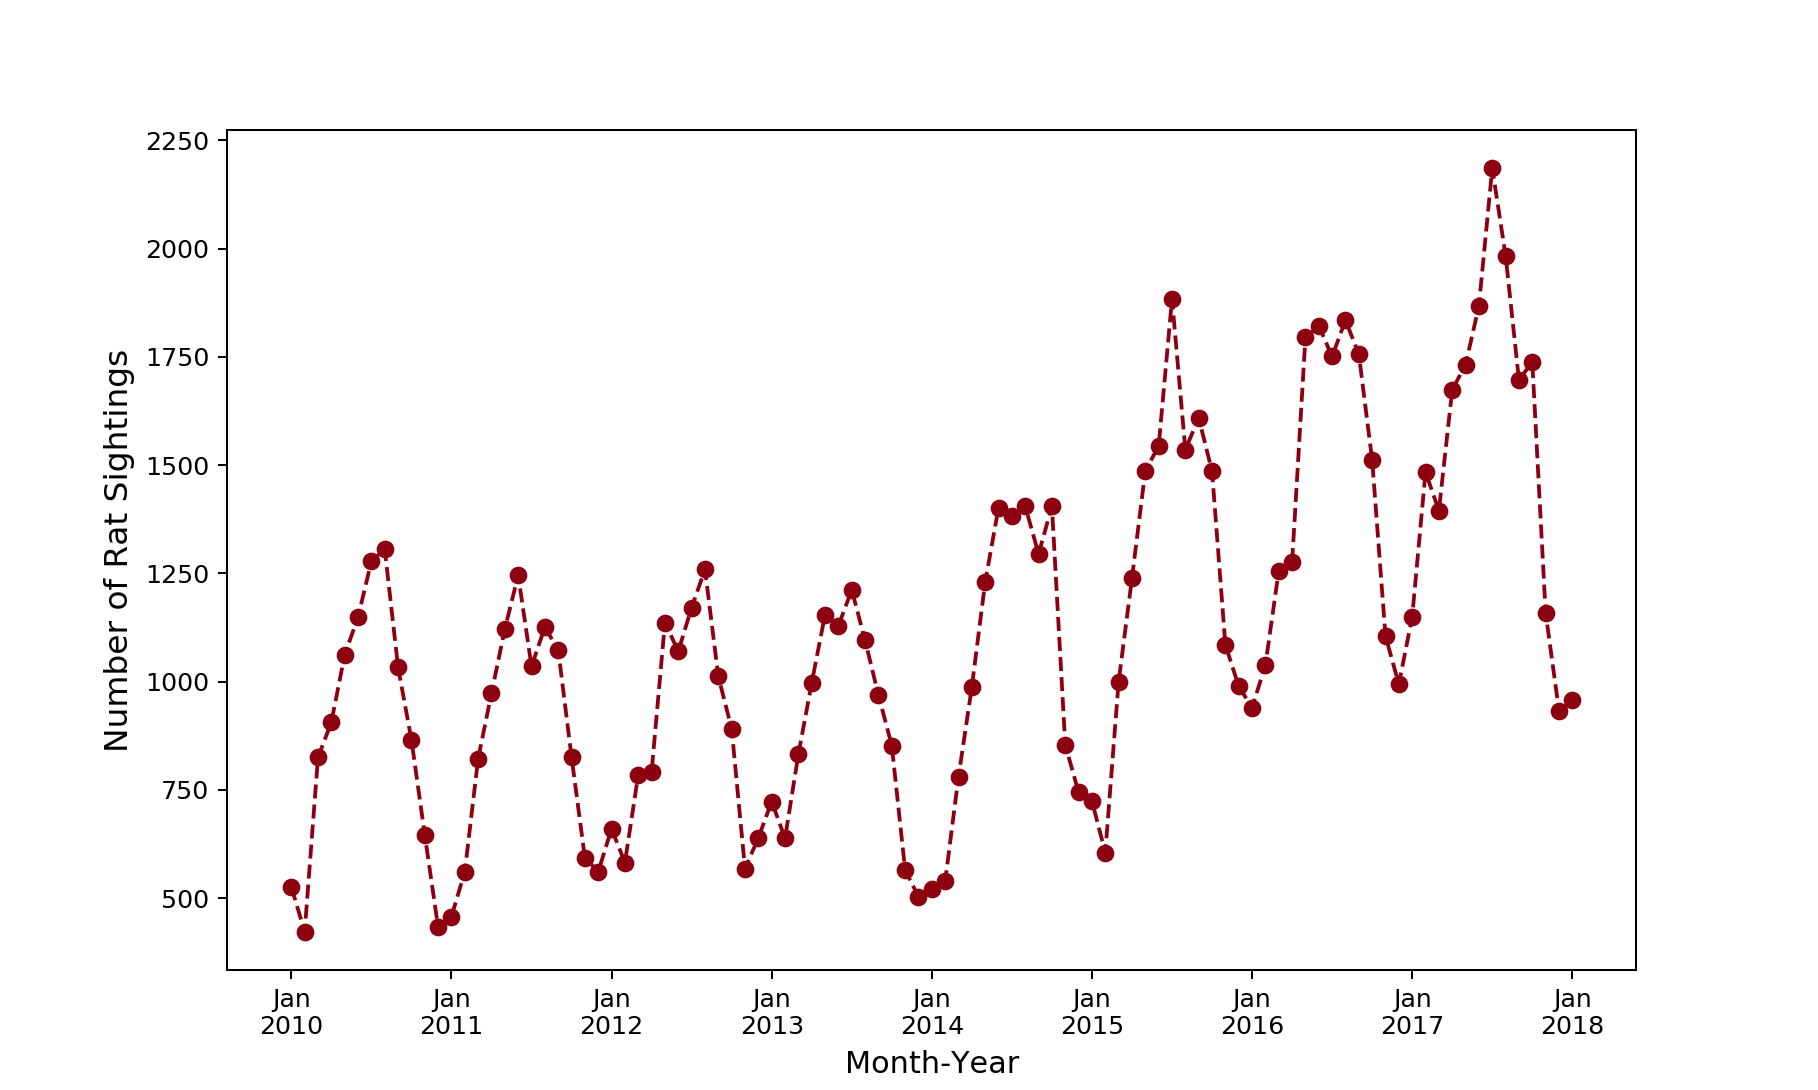

In [152]:
#total number of sightings as a function of time
fig = plt.figure(figsize=(10, 6))
num_sightings = anim_data_new.size().values

plt.plot(timepoints[:-1],num_sightings[:-1],linestyle='--', marker='o',color = 'xkcd:crimson')
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Rat Sightings", fontsize=13)
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01'],
           ["Jan\n2010","Jan\n2011","Jan\n2012","Jan\n2013","Jan\n2014","Jan\n2015","Jan\n2016","Jan\n2017","Jan\n2018"])
plt.show()


In [169]:
dataset_intervention.head()
dataset_intervention['INSPECTION_DATE'] = pd.to_datetime(dataset_intervention['INSPECTION_DATE'], format='%m/%d/%Y %I:%M:%S %p')

intervention_types = dataset_intervention.groupby('INSPECTION_TYPE')
intervention_types_numbers = intervention_types.size()
bait_interventions = intervention_types.get_group('BAIT')

bait_interventions = bait_interventions.dropna()
bait_interventions['YearMonth'] = bait_interventions['INSPECTION_DATE'].map(lambda x: x.strftime('%Y-%m'))

<IPython.core.display.Javascript object>


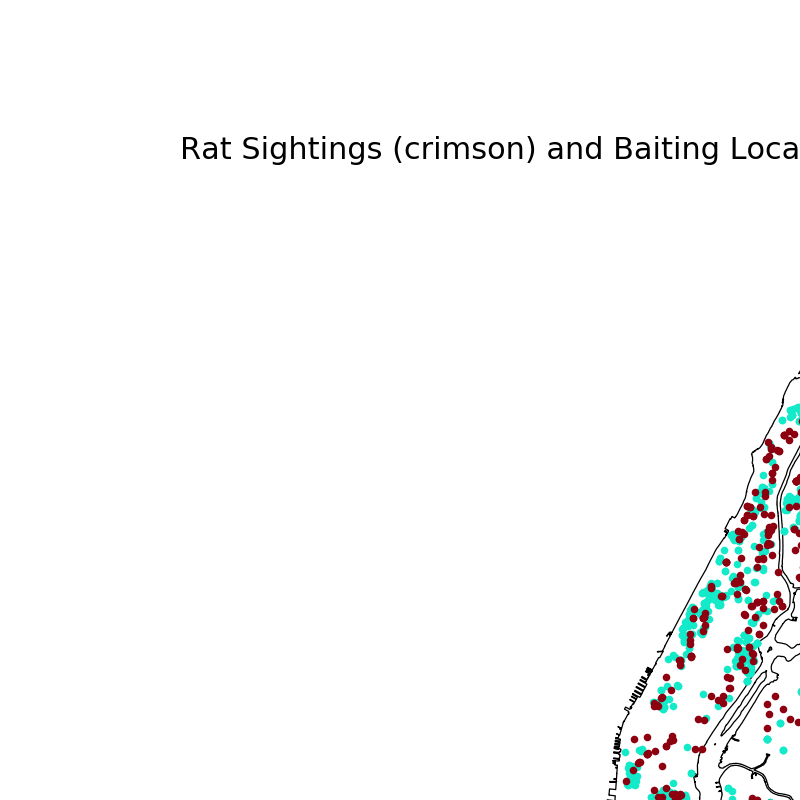

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [210]:
anim_data_sightings = dataset_sightings_locations.groupby('YearMonth') #
anim_data_bait = bait_interventions.groupby('YearMonth')

timepoints = dataset_sightings_locations['YearMonth'].unique()
timepoints.sort()
 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

m = Basemap(llcrnrlat=40.55,urcrnrlat=40.95,llcrnrlon=-74.2, urcrnrlon=-73.7, lat_ts=40.5, resolution='c', projection='merc')
m.readshapefile('geo_export_466a4803-d862-4a61-914b-7783568f80f5', 'comarques')
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

xi,yi = m(0, 0)
pointi = m.plot(xi, yi, 'ro', markersize=2, color = 'xkcd:aqua')[0]

x,y = m(0, 0)
point = m.plot(x, y, 'ro', markersize=2, color = 'xkcd:crimson')[0]



def init():
    pointi.set_data([], [])
    return pointi, point,

def animate(i):
    xi, yi = m(anim_data_bait.get_group(timepoints[i]).LONGITUDE.tolist(), anim_data_bait.get_group(timepoints[i]).LATITUDE.tolist())
    pointi.set_data(xi, yi)
    x, y = m(anim_data_sightings.get_group(timepoints[i]).Longitude.tolist(), anim_data_sightings.get_group(timepoints[i]).Latitude.tolist())
    point.set_data(x, y)
    plt.title('Rat Sightings (crimson) and Baiting Locations (aqua): Year ' + str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].year) + ' Month '+ str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].month).zfill(2))
#     #frames for makeing a gif:
#     plt.savefig('RatSightingsBaiting'+ str(i).zfill(2) +'.jpg', dpi=200)
    return pointi, point,

anim_bait = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(timepoints)-1, interval=100, blit=True,repeat = False, save_count=len(timepoints))

plt.show()


In [198]:
timepoints

array(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', 